In [1]:
import graph_tool.all as gt
from math import sqrt

In [2]:
from random import *

In [15]:
from libs.community_detection.worker_selection import *
from libs.evaluation import *

In [4]:
csvGraphsPath="../graphs/csv/"
csvGraphFileName="facebook_combined.csv"
csvGraphFilePath=csvGraphsPath+csvGraphFileName
formatedGraphPath="../graphs/formatted/"
fbGraph=gt.load_graph_from_csv(csvGraphFilePath)

In [5]:
import igraph as ig

In [6]:
F=ig.Graph.Read("../graphs/formatted/facebook_combined.csv",format="ncol").as_undirected()

In [7]:
nbWorkers=100

In [9]:
%time F,workerIds,partition,clusterGraph,clusterIds=assignWorkers(F,nbWorkers)
print(workerIds)

igraph.Vertex(<igraph.Graph object at 0x7f5882a818b0>, 0, {'name': 'V\ufeff0', 'color': (1, 0.0, 0.0), 'cluster': 0})
igraph.Vertex(<igraph.Graph object at 0x7f5882a818b0>, 28, {'name': 'V910', 'color': (1, 0.0, 0.4615384615384617), 'cluster': 1})
igraph.Vertex(<igraph.Graph object at 0x7f5882a818b0>, 2, {'name': 'V899', 'color': (1, 0.46153846153846156, 0.0), 'cluster': 2})
igraph.Vertex(<igraph.Graph object at 0x7f5882a818b0>, 192, {'name': 'V1969', 'color': (1, 0.0, 0.9230769230769234), 'cluster': 3})
igraph.Vertex(<igraph.Graph object at 0x7f5882a818b0>, 5, {'name': 'V996', 'color': (1, 0.9230769230769231, 0.0), 'cluster': 4})
igraph.Vertex(<igraph.Graph object at 0x7f5882a818b0>, 18, {'name': 'V945', 'color': (0.6153846153846159, 0.0, 1), 'cluster': 5})
igraph.Vertex(<igraph.Graph object at 0x7f5882a818b0>, 17, {'name': 'V1016', 'color': (0.6153846153846154, 1, 0.0), 'cluster': 6})
igraph.Vertex(<igraph.Graph object at 0x7f5882a818b0>, 9, {'name': 'V865', 'color': (0.1538461538461

### What if we distantiated workers based on the whole graph (as if one unique community)

%time workerIds=F.vs[maxShortestPathNodesSelection(F,nbWorkers)]["name"]

### Arbitrary workers

In [10]:
workerIds=['V2927', 'V2962', 'V1546', 'V2358', 'V1924', 'V1190', 'V2638', 'V3183', 'V4017', 'V2861', 'V1579', 'V609', 'V23', 'V3605', 'V3810', 'V3429', 'V3606', 'V2070', 'V1077', 'V2216', 'V189', 'V696', 'V2806', 'V182', 'V1878', 'V1109', 'V3435', 'V2700', 'V3997', 'V1764', 'V3486', 'V3953', 'V2444', 'V98', 'V2808', 'V1530', 'V256', 'V3033', 'V185', 'V588', 'V39', 'V1558', 'V2507', 'V1728', 'V1328', 'V181', 'V2701', 'V3660', 'V985', 'V3315', 'V399', 'V400', 'V1410', 'V126', 'V1444', 'V667', 'V2672', 'V2368', 'V197', 'V3974', 'V1586', 'V3424', 'V1726', 'V1066', 'V1561', 'V3054', 'V2582', 'V3897', 'V3386', 'V1114', 'V593', 'V447', 'V1182', 'V2760', 'V2654', 'V2033', 'V683', 'V878', 'V281', 'V2052', 'V2804', 'V840', 'V2130', 'V1469', 'V2148', 'V3745', 'V3093', 'V4004', 'V431', 'V572', 'V3539', 'V935', 'V3970', 'V2704', 'V3996', 'V762', 'V1349', 'V1927', 'V454', 'V3643']

## Plot

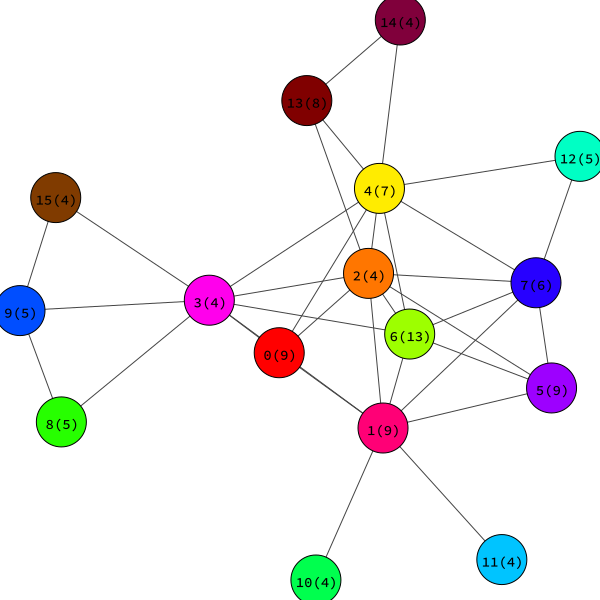

In [11]:
for idx, cluster in enumerate(clusterGraph.vs):
    if cluster.index in clusterIds:
        cluster["size"]=50
    cluster["color"]=partition.subgraph(idx).vs[0]["color"]
    cluster["label"]="{}({})".format(idx,cluster["nb_workers"])
ig.plot(clusterGraph)

In [12]:
for v in F.vs:
    if v["name"] in workerIds:
        v["size"]=25
        v["shape"]="triangle"
    else:
        v["size"]=1
        v["shape"]="circle"

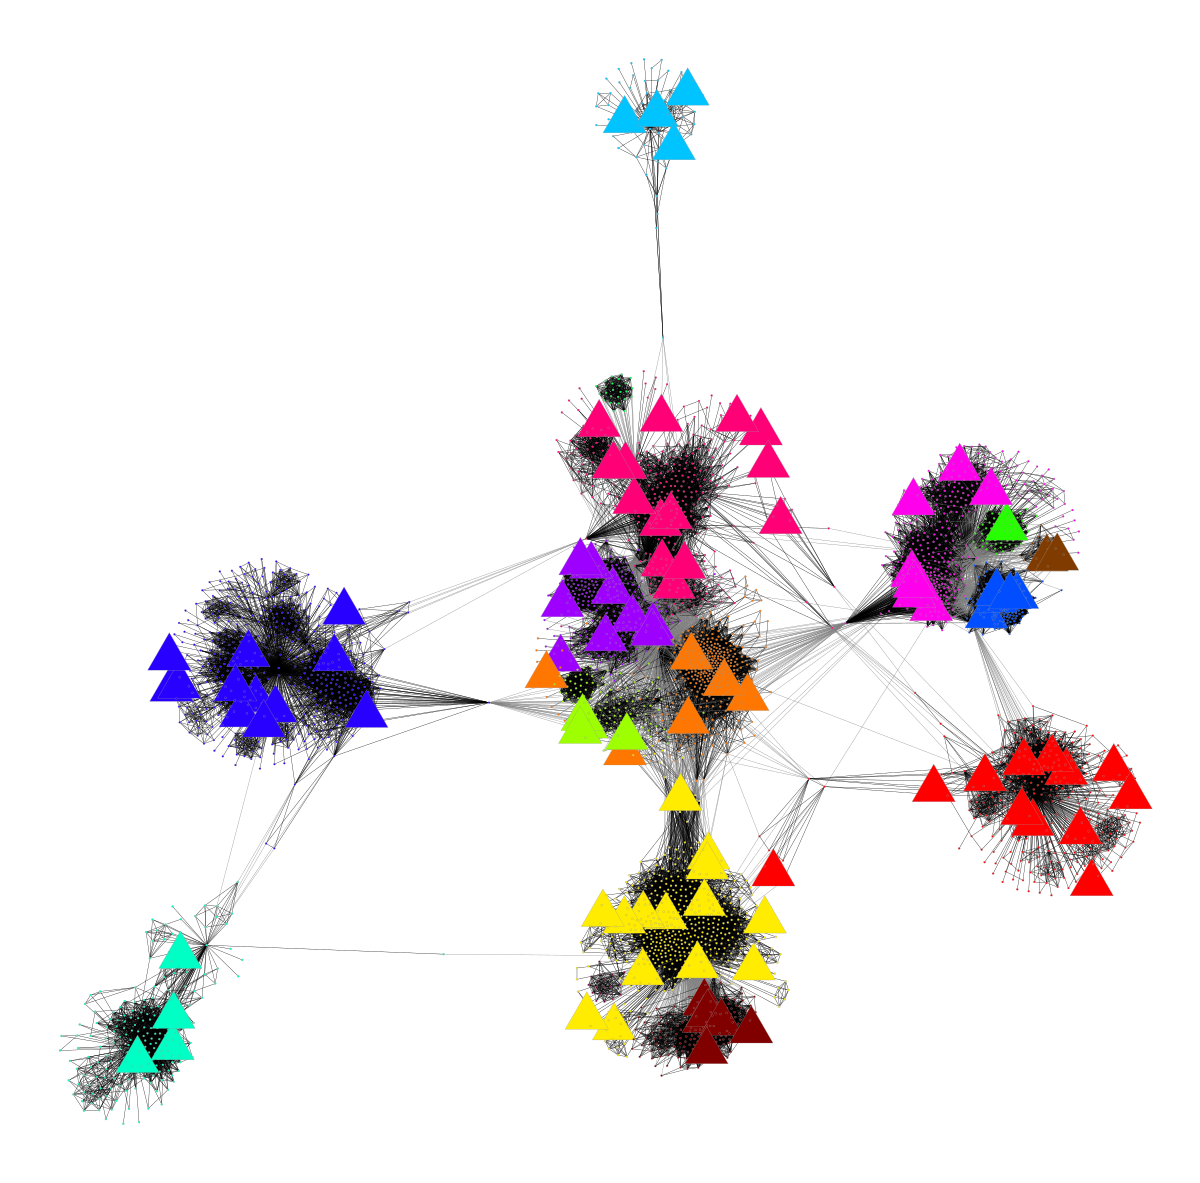

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f58828db5e0, at 0x7f58bc2d0d30>

In [13]:
G=F.to_graph_tool(vertex_attributes={"color":"vector<float>","size":"int","shape":"string"},edge_attributes={"color":"vector<float>"})
gt.graph_draw(G, vertex_fill_color=G.vertex_properties["color"],vertex_shape=G.vertex_properties["shape"],vertex_size=G.vertex_properties["size"],edge_color=G.edge_properties["color"])

## Evaluate

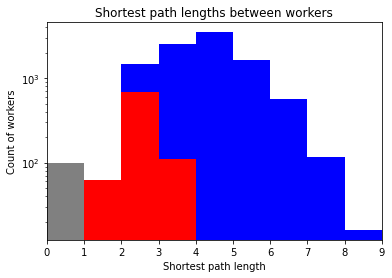

In [16]:
import numpy as np
from matplotlib import pyplot as plt

data=list(graphDistances(F,workerIds))
maxDist=max([max(l,default=0) for l in data],default=0)
colors=["grey","red","blue"]
labels=["self","same community","other community"]
# fixed bin size
bins = np.arange(0, 100, 1) # fixed bin size

plt.xlim([0, maxDist+1])
plt.yscale("log")
plt.hist(data, bins=bins, color=colors, label=labels, stacked=True)
plt.title('Shortest path lengths between workers')
plt.xlabel('Shortest path length')
plt.ylabel('Count of workers')

plt.show()

In [17]:
#the greater the value, the better
print(sum([sum(l) for l in data]))

37134


### Intra cluster distances

NameError: name 'imgPath' is not defined

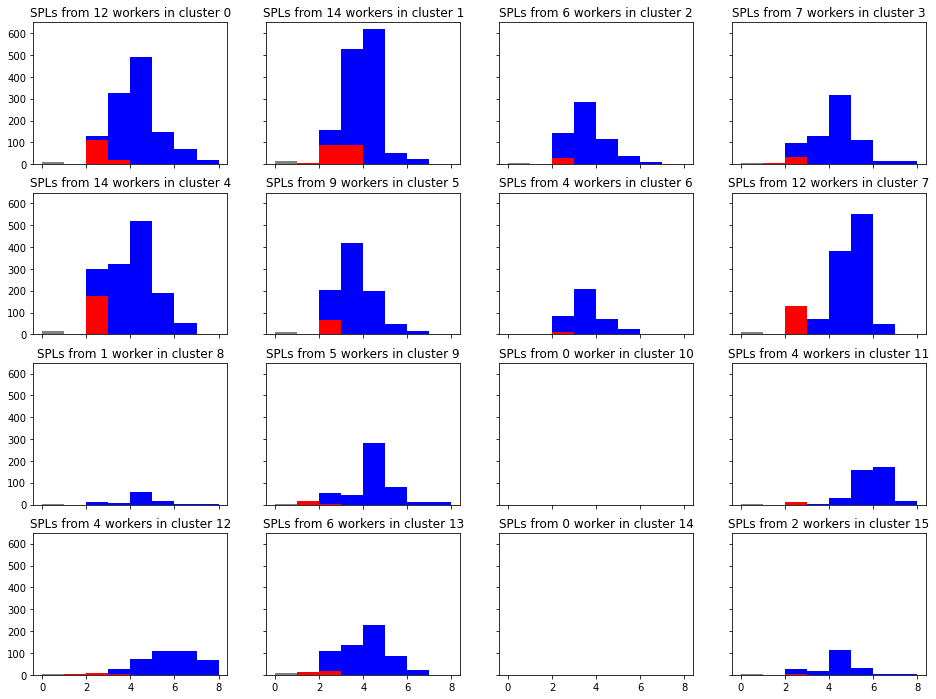

In [19]:
import numpy as np
from matplotlib import pyplot as plt

nbClusters=len(partition.subgraphs())
nbCol=4
fig,ax = plt.subplots(nrows = nbClusters//nbCol, ncols = nbCol,sharex=True, sharey=True,figsize=(nbCol*4,3*nbClusters//nbCol))

for idx, subgraph in enumerate(partition.subgraphs()):
    inClusterWorkers=[w for w in workerIds if w in subgraph.vs["name"]]
    data=list(graphDistances(F,inClusterWorkers,workerIds,subgraph.vs[0]["cluster"]))
    colors=["grey","red","blue"]
    labels=["self","same community","other community"]

    # fixed bin size
    bins = np.arange(0, maxDist+1, 1) # fixed bin size

    ax[idx//nbCol][idx%nbCol].hist(data, bins=bins, color=colors, label=labels, stacked=True)
    ax[idx//nbCol][idx%nbCol].title.set_text('SPLs from {} worker{} in cluster {}'.format(len(inClusterWorkers),"s" if len(inClusterWorkers)>1 else "",idx))
fig.xlim=[0, maxDist+1]
fig.yscale="log"
fig.suptitle='Shortest path lengths between workers'
fig.xlabel='Shortest path length'
fig.ylabel='Count of workers'
fig.savefig(imgPath)
plt.close(fig)

## Graph Metrics

### Max distance between nodes (graph diameter)

In [ ]:
print(F.diameter())

### Distances inter-nodes intra-clusters (cluster diameters)

In [ ]:
subgraphs=partition.subgraphs()
diameters=list([subgraph.diameter() for subgraph in subgraphs])
plt.plot(diameters)

In [ ]:
radii=list([subgraph.radius() for subgraph in subgraphs])
plt.plot(radii)

### Nodes per community

In [ ]:
from collections import Counter
nbClusters=len(Counter(F.vs["cluster"]))

In [ ]:
bins = np.arange(0, nbClusters+1, 1)
plt.hist(F.vs["cluster"], bins=bins)
plt.title('Number of nodes in communities')
plt.xlabel('Community')
plt.ylabel('Count of nodes')

plt.show()

### Workers per cluster

In [ ]:
data=[F.vs.find(worker)["cluster"] for worker in workerIds]
bins = np.arange(0, nbClusters+1, 1)
plt.hist(data, bins=bins)
plt.title('Number of workers in communities')
plt.xlabel('Community')
plt.ylabel('Count of workers')

plt.show()

### Cluster diameter based worker count

In [ ]:
diameters=[subgraph.diameter() for subgraph in partition.subgraphs()]

workers=[diameter//2+diameter%2 for diameter in diameters]
assignedWorkers=sum(workers)
print(assignedWorkers)